# Logistic Regression
Loan Approval -Financial analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.metrics import accuracy_score

In [5]:
data=pd.read_csv("LoanApprovalPrediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


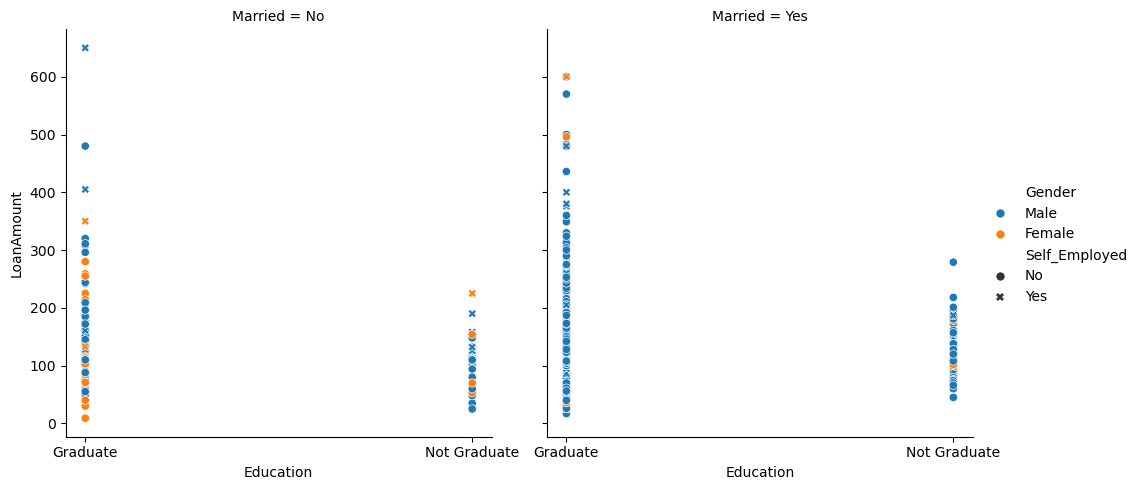

In [6]:
snr.relplot(x="Education",y="LoanAmount",hue="Gender",style="Self_Employed",col="Married",data=data)


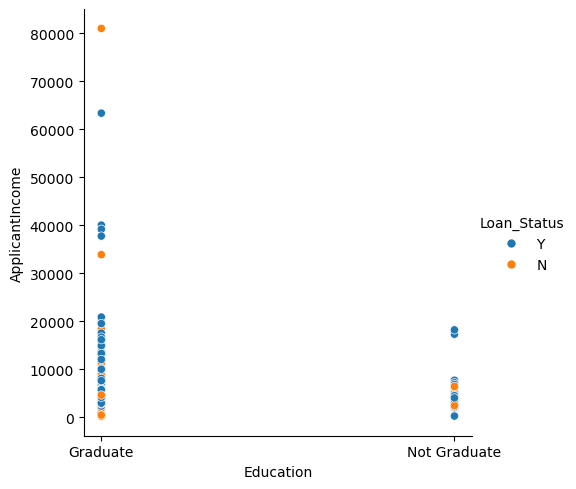

In [7]:
snr.relplot(x="Education",y="ApplicantIncome",hue="Loan_Status",data=data)

<Axes: >

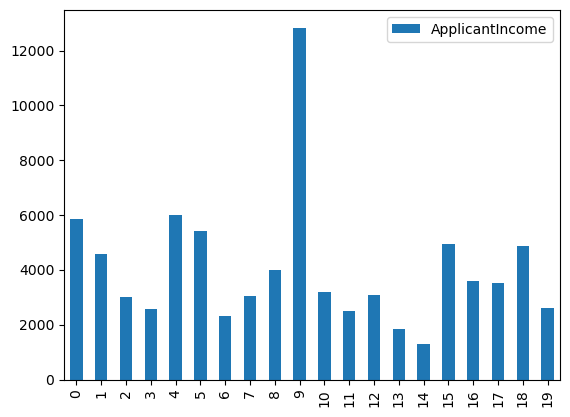

In [8]:
df=data.iloc[0:20]
df[["ApplicantIncome","Loan_Status"]].plot(kind="bar")

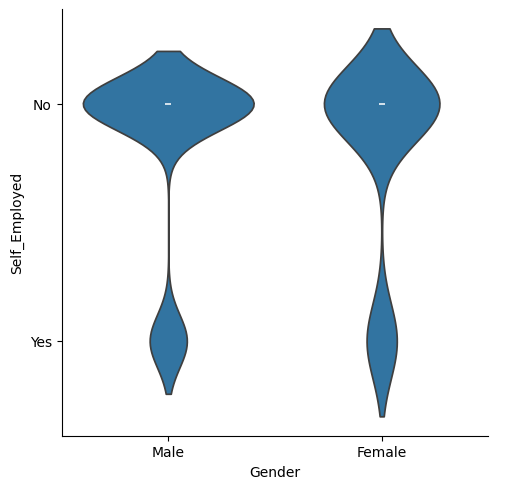

In [9]:
snr.catplot(x="Gender",y="Self_Employed",data=data,kind="violin")

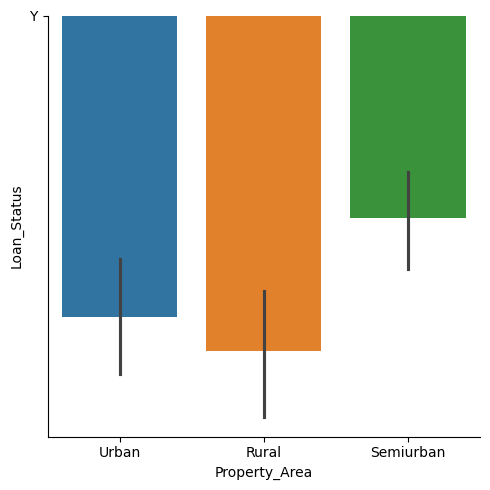

In [10]:
snr.catplot(x="Property_Area",y="Loan_Status",hue="Property_Area",data=data,kind="bar")

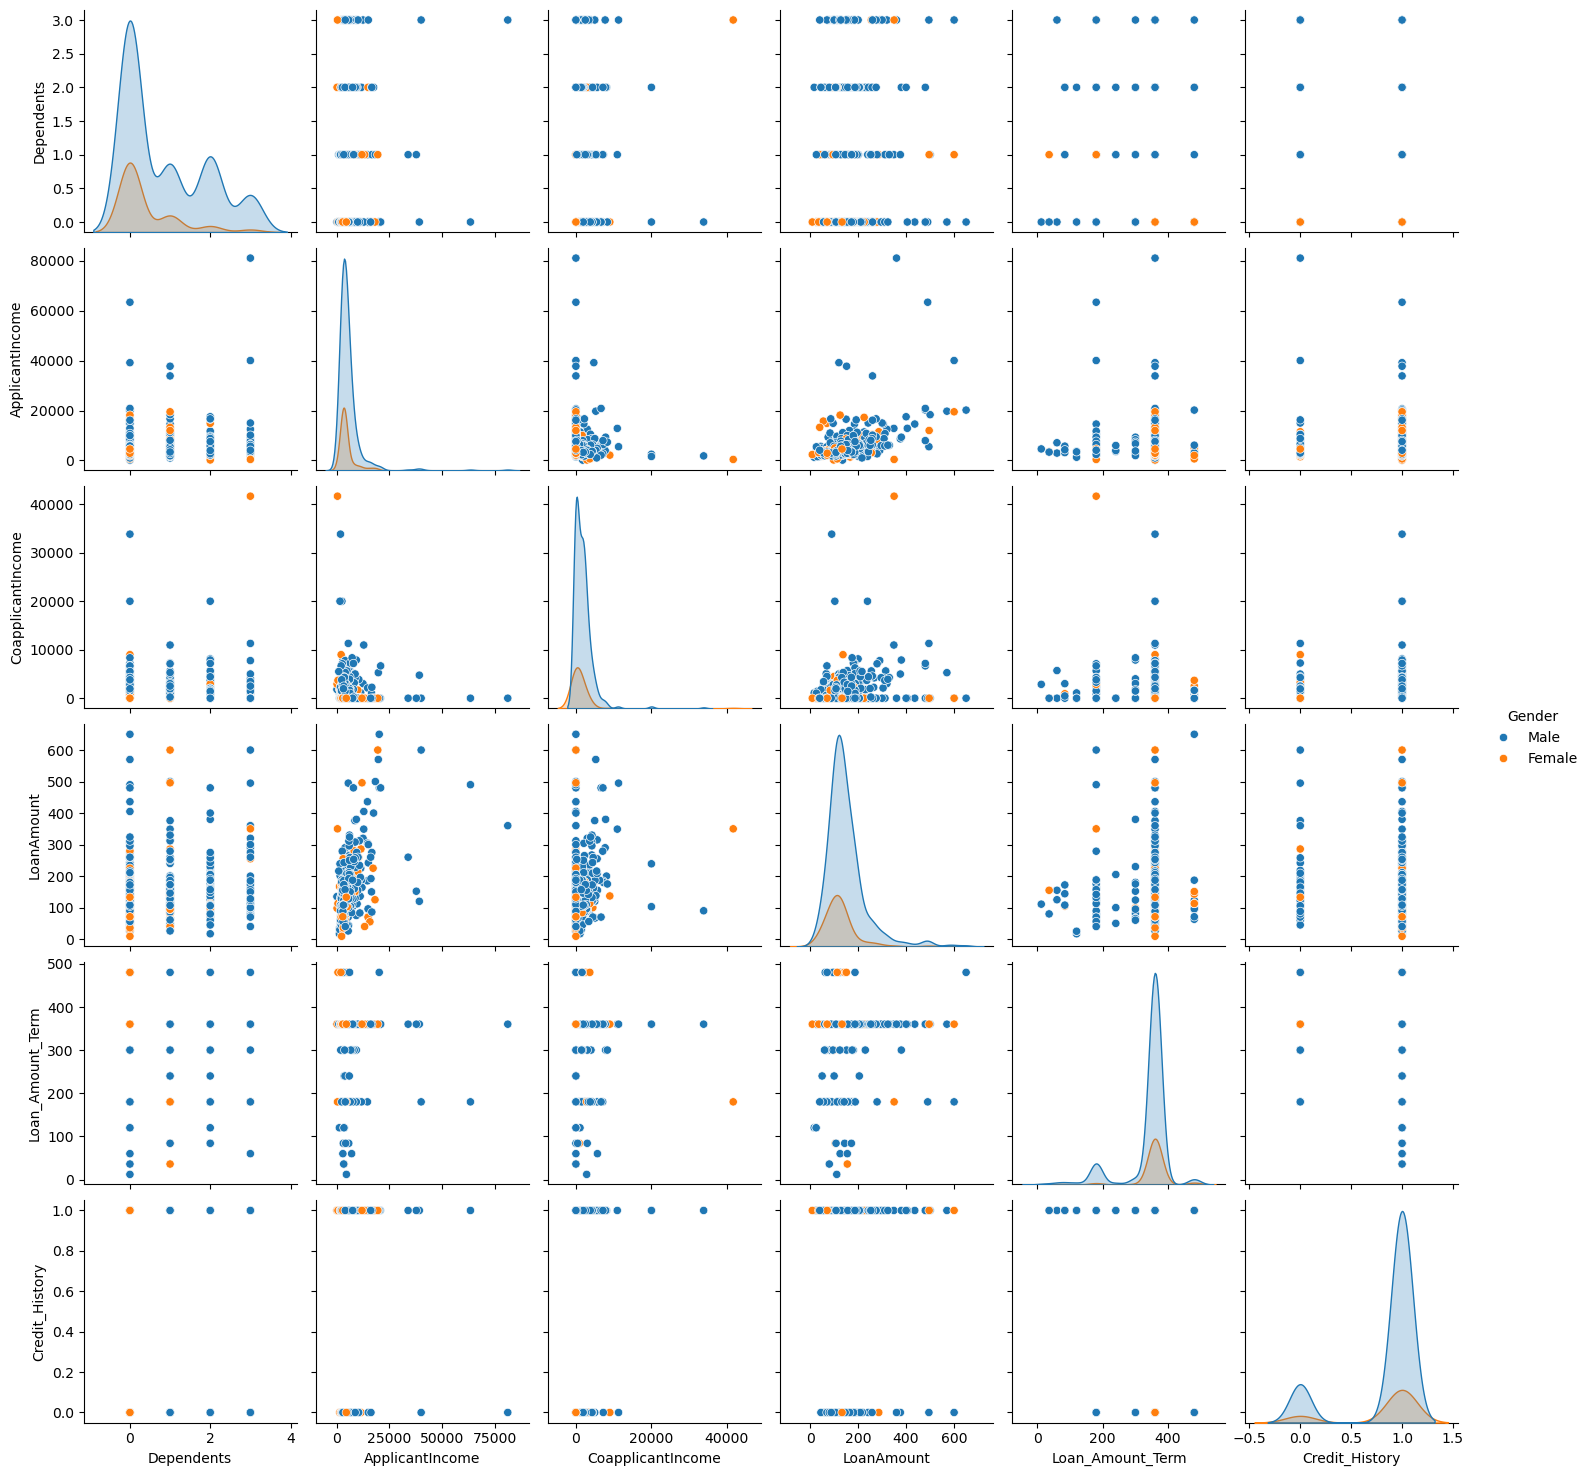

In [11]:
snr.pairplot(data,hue="Gender")

In [12]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data["Married"]=label_encoder.fit_transform(data["Married"])
data["Married"].unique()

array([0, 1])

In [15]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
data["Gender"]=label_encoder.fit_transform(data["Gender"])
data["Gender"].unique()

array([1, 0])

In [17]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
data["Education"]=label_encoder.fit_transform(data["Gender"])
data["Education"].unique()

array([1, 0], dtype=int64)

In [19]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data["Self_Employed"]=label_encoder.fit_transform(data["Self_Employed"])
data["Self_Employed"].unique()

array([0, 1])

In [21]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [22]:
data["Property_Area"]=label_encoder.fit_transform(data["Property_Area"])
data["Property_Area"].unique()

array([2, 0, 1])

In [23]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [24]:
data["Loan_Status"]=label_encoder.fit_transform(data["Loan_Status"])
data["Loan_Status"].unique()

array([1, 0])

In [25]:
df=data.drop(["Loan_ID"],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,1
596,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [26]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].mean())

In [27]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)

In [29]:
model.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_hat=model.predict(x_test)

In [31]:
acc=accuracy_score(y_test,y_hat)

In [32]:
acc

0.8083333333333333